In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('loans_data.csv')
df.head()

,ID,Status,Amount,ApplicationSignedHour,ApplicationSignedWeekday,City,Country,CreditScoreEsEquifaxRisk,DateOfBirth,DebtToIncome,Education,EmploymentDurationCurrentEmployer,EmploymentPosition,EmploymentStatus,ExistingLiabilities,Gender,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeTotal,Interest rate (APR),LoanDate,LoanDuration,MaritalStatus,NewCreditCustomer,NoOfPreviousLoansBeforeLoan,OccupationArea,UseOfLoan,VerificationType,WorkExperience,PreviousScore,Defaulted,DefaultDate
0,0,Current,5000.0,12,4,AESPA,EE,NaN,21/11/1975,51.52,4.0,UpTo5Years,Worker,3.0,9,0.0,6.0,1000.0,1000.0,24.52,05/05/2015,60,4.0,False,1,8.0,0,1.0,15To25Years,0.0957,False,NaN
1,2,Repaid,530.0,14,2,PÄRNU,EE,NaN,25/10/1969,30.32,4.0,MoreThan5Years,SpecialistOfficeWorker,3.0,7,1.0,9.0,633.0,633.0,25.68,19/10/2015,60,1.0,True,0,1.0,2,4.0,15To25Years,0.1034,False,NaN
2,3,Current,5500.0,22,4,TALLINN,EE,NaN,22/11/1965,29.57,4.0,MoreThan5Years,Owner,5.0,1,0.0,1.0,550.0,550.0,21.62,02/09/2015,60,4.0,True,0,13.0,2,3.0,MoreThan25Years,0.0772,False,NaN
3,4,Repaid,6900.0,15,3,KEHTNA,EE,NaN,05/12/1983,45.75,2.0,MoreThan5Years,Worker,3.0,10,0.0,1.0,833.0,833.0,21.63,20/05/2015,60,3.0,False,1,19.0,7,4.0,5To10Years,0.0773,False,NaN
4,5,Current,2655.0,10,3,KIVIÕLI,EE,NaN,13/07/1980,25.40,4.0,MoreThan5Years,Worker,3.0,6,1.0,4.0,341.0,341.0,26.88,29/12/2015,60,3.0,True,0,17.0,2,4.0,5To10Years,0.1898,False,NaN


# Data Preprocessing Part 1

In [3]:
# Remove identifier column
df.drop(columns = 'ID', inplace=True)

In [4]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

Status                                   3
City                                  4528
Country                                  4
CreditScoreEsEquifaxRisk                 6
DateOfBirth                          10923
EmploymentDurationCurrentEmployer        7
EmploymentPosition                    2767
LoanDate                              2389
WorkExperience                           6
DefaultDate                            942
dtype: int64

In [5]:
# Drop DefaultDate column because we dont need it and drop City and EmploymentPosition because there's alot of unique value
df.drop(columns = ['DefaultDate', 'City', 'EmploymentPosition'], inplace=True)

In [6]:
# Only extract year on DateOfBirth and LoanDate
df['DateOfBirth'] = df['DateOfBirth'].str[-4:]
df['LoanDate'] = df['LoanDate'].str[-4:]

# Convert LastFourDOB and LastFourLoanDate columns to int
df['DateOfBirth'] = df['DateOfBirth'].astype(int)
df['LoanDate'] = df['LoanDate'].astype(int)

df.head()

,Status,Amount,ApplicationSignedHour,ApplicationSignedWeekday,Country,CreditScoreEsEquifaxRisk,DateOfBirth,DebtToIncome,Education,EmploymentDurationCurrentEmployer,EmploymentStatus,ExistingLiabilities,Gender,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeTotal,Interest rate (APR),LoanDate,LoanDuration,MaritalStatus,NewCreditCustomer,NoOfPreviousLoansBeforeLoan,OccupationArea,UseOfLoan,VerificationType,WorkExperience,PreviousScore,Defaulted
0,Current,5000.0,12,4,EE,NaN,1975,51.52,4.0,UpTo5Years,3.0,9,0.0,6.0,1000.0,1000.0,24.52,2015,60,4.0,False,1,8.0,0,1.0,15To25Years,0.0957,False
1,Repaid,530.0,14,2,EE,NaN,1969,30.32,4.0,MoreThan5Years,3.0,7,1.0,9.0,633.0,633.0,25.68,2015,60,1.0,True,0,1.0,2,4.0,15To25Years,0.1034,False
2,Current,5500.0,22,4,EE,NaN,1965,29.57,4.0,MoreThan5Years,5.0,1,0.0,1.0,550.0,550.0,21.62,2015,60,4.0,True,0,13.0,2,3.0,MoreThan25Years,0.0772,False
3,Repaid,6900.0,15,3,EE,NaN,1983,45.75,2.0,MoreThan5Years,3.0,10,0.0,1.0,833.0,833.0,21.63,2015,60,3.0,False,1,19.0,7,4.0,5To10Years,0.0773,False
4,Current,2655.0,10,3,EE,NaN,1980,25.40,4.0,MoreThan5Years,3.0,6,1.0,4.0,341.0,341.0,26.88,2015,60,3.0,True,0,17.0,2,4.0,5To10Years,0.1898,False


In [7]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

Status                               3
Country                              4
CreditScoreEsEquifaxRisk             6
EmploymentDurationCurrentEmployer    7
WorkExperience                       6
dtype: int64

# Exploratory Data Analysis

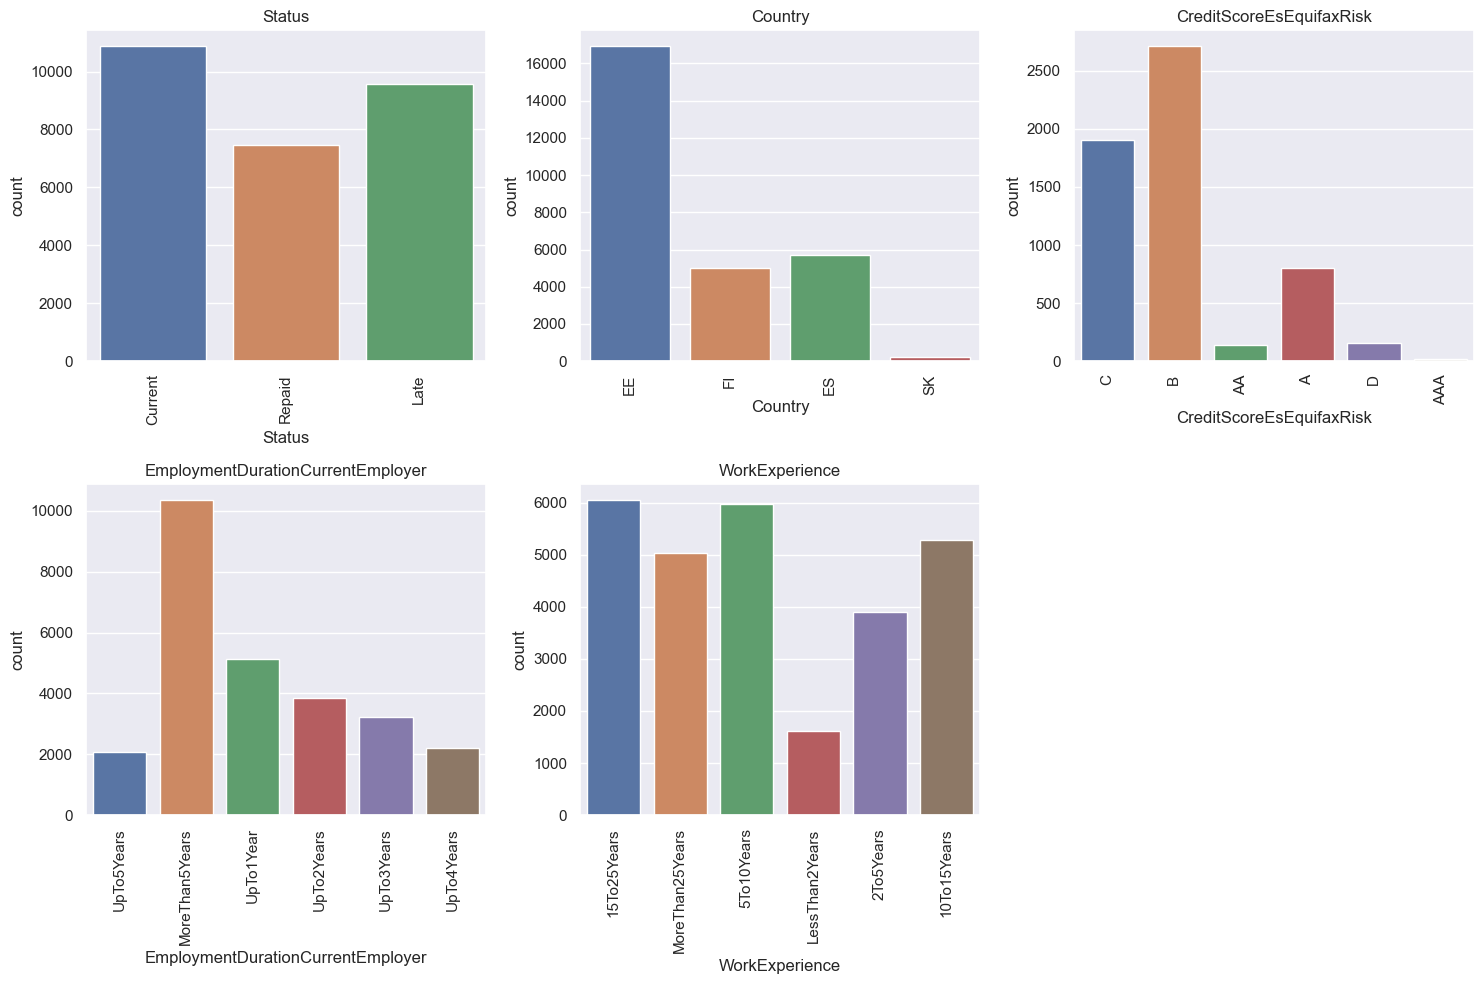

In [8]:
# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for the top 6 values of each categorical variable using Seaborn
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

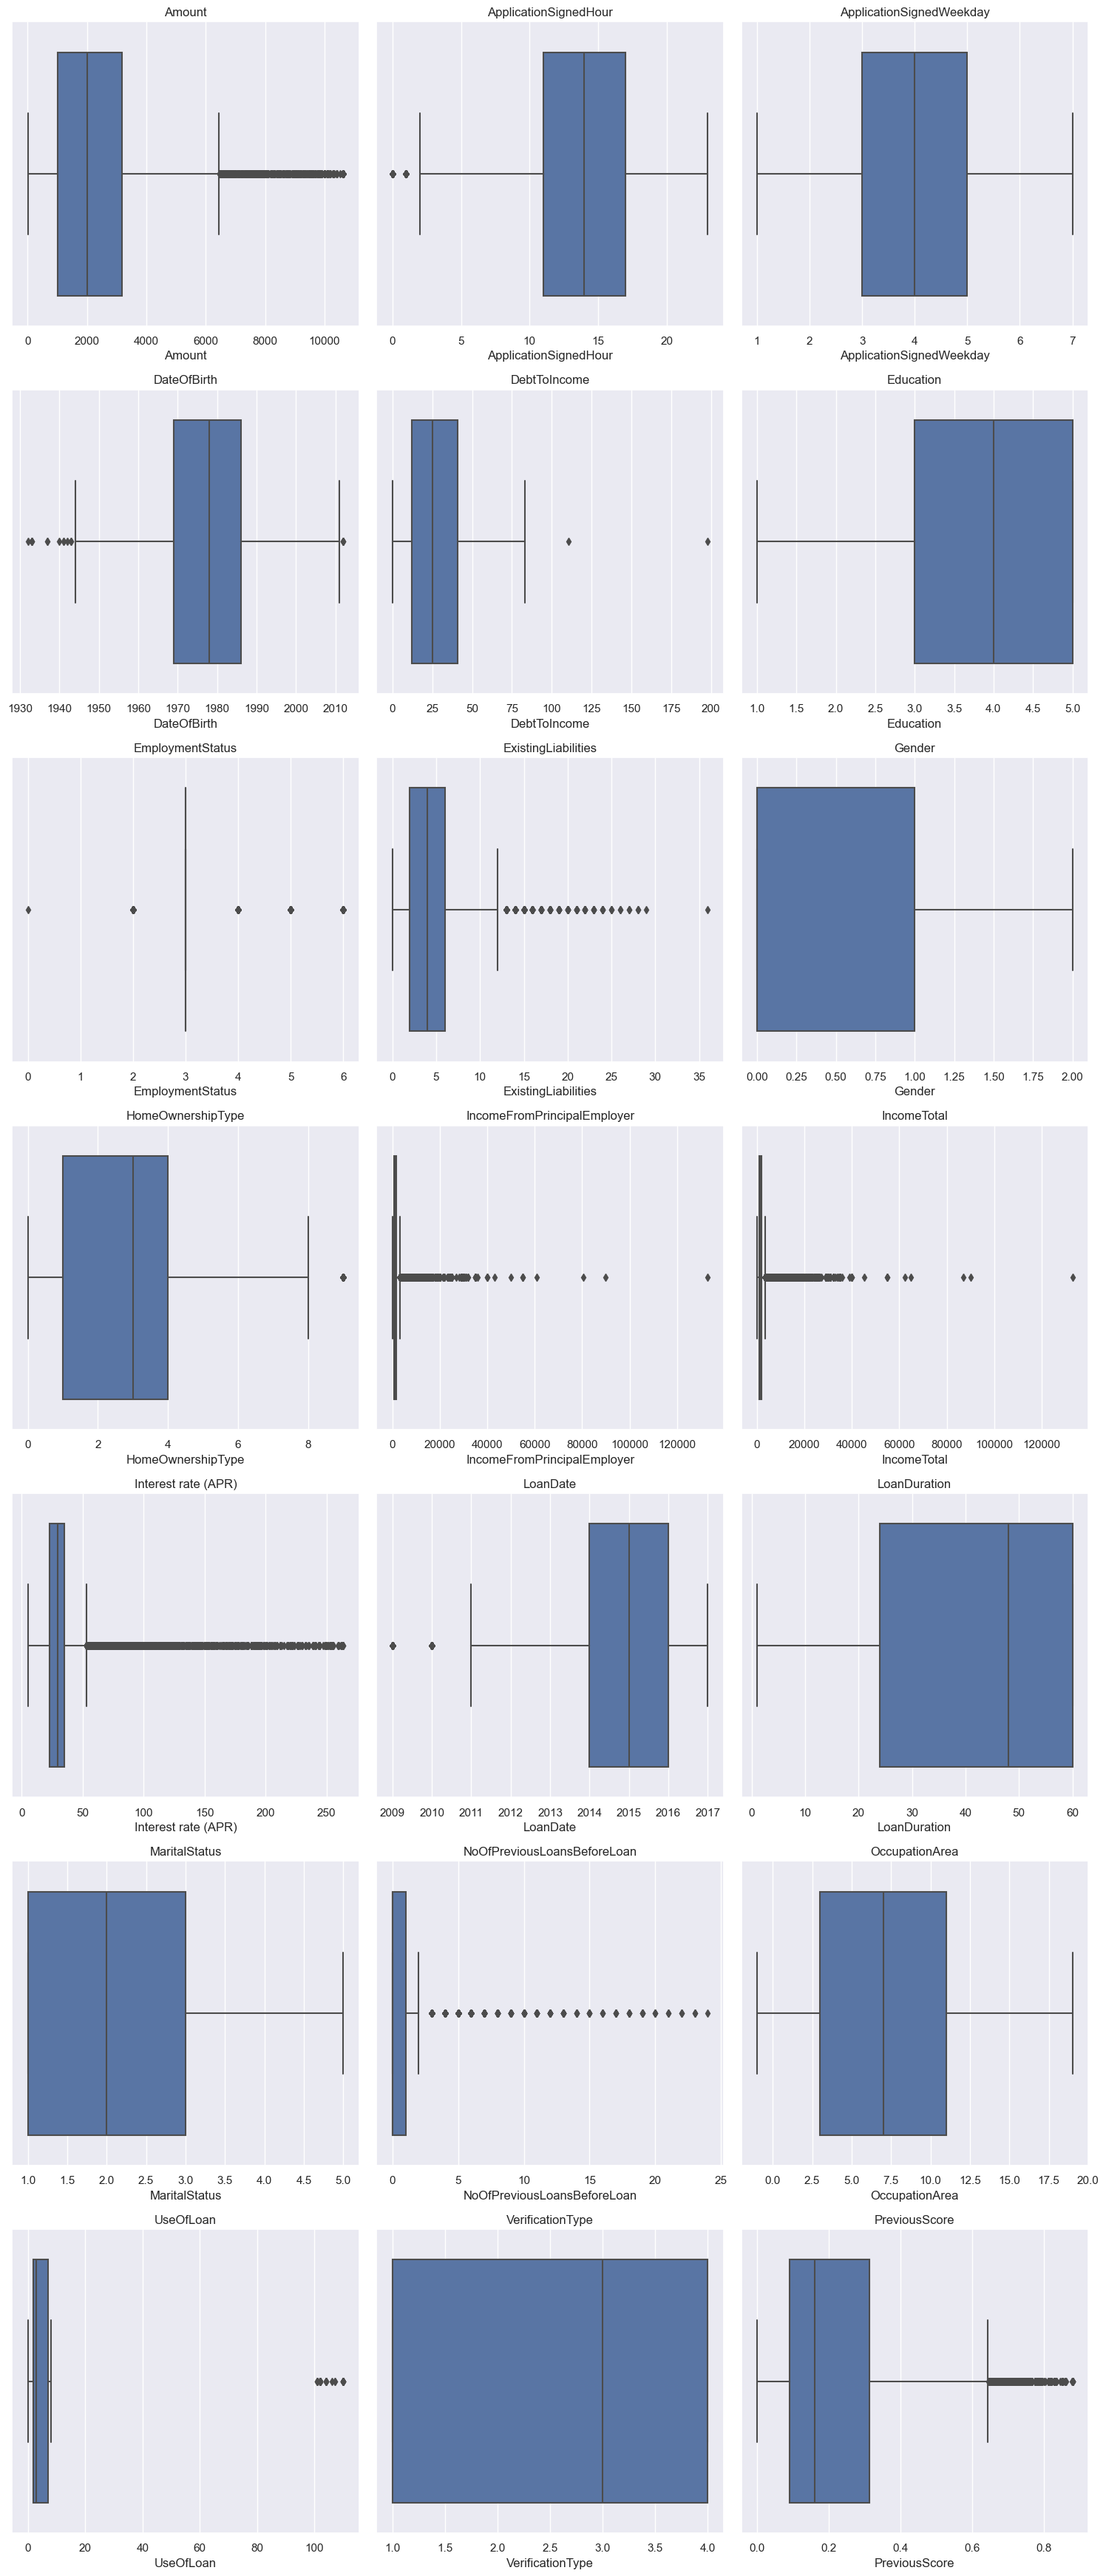

In [9]:
# Get the names of all columns with data type 'int' or 'float' 
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

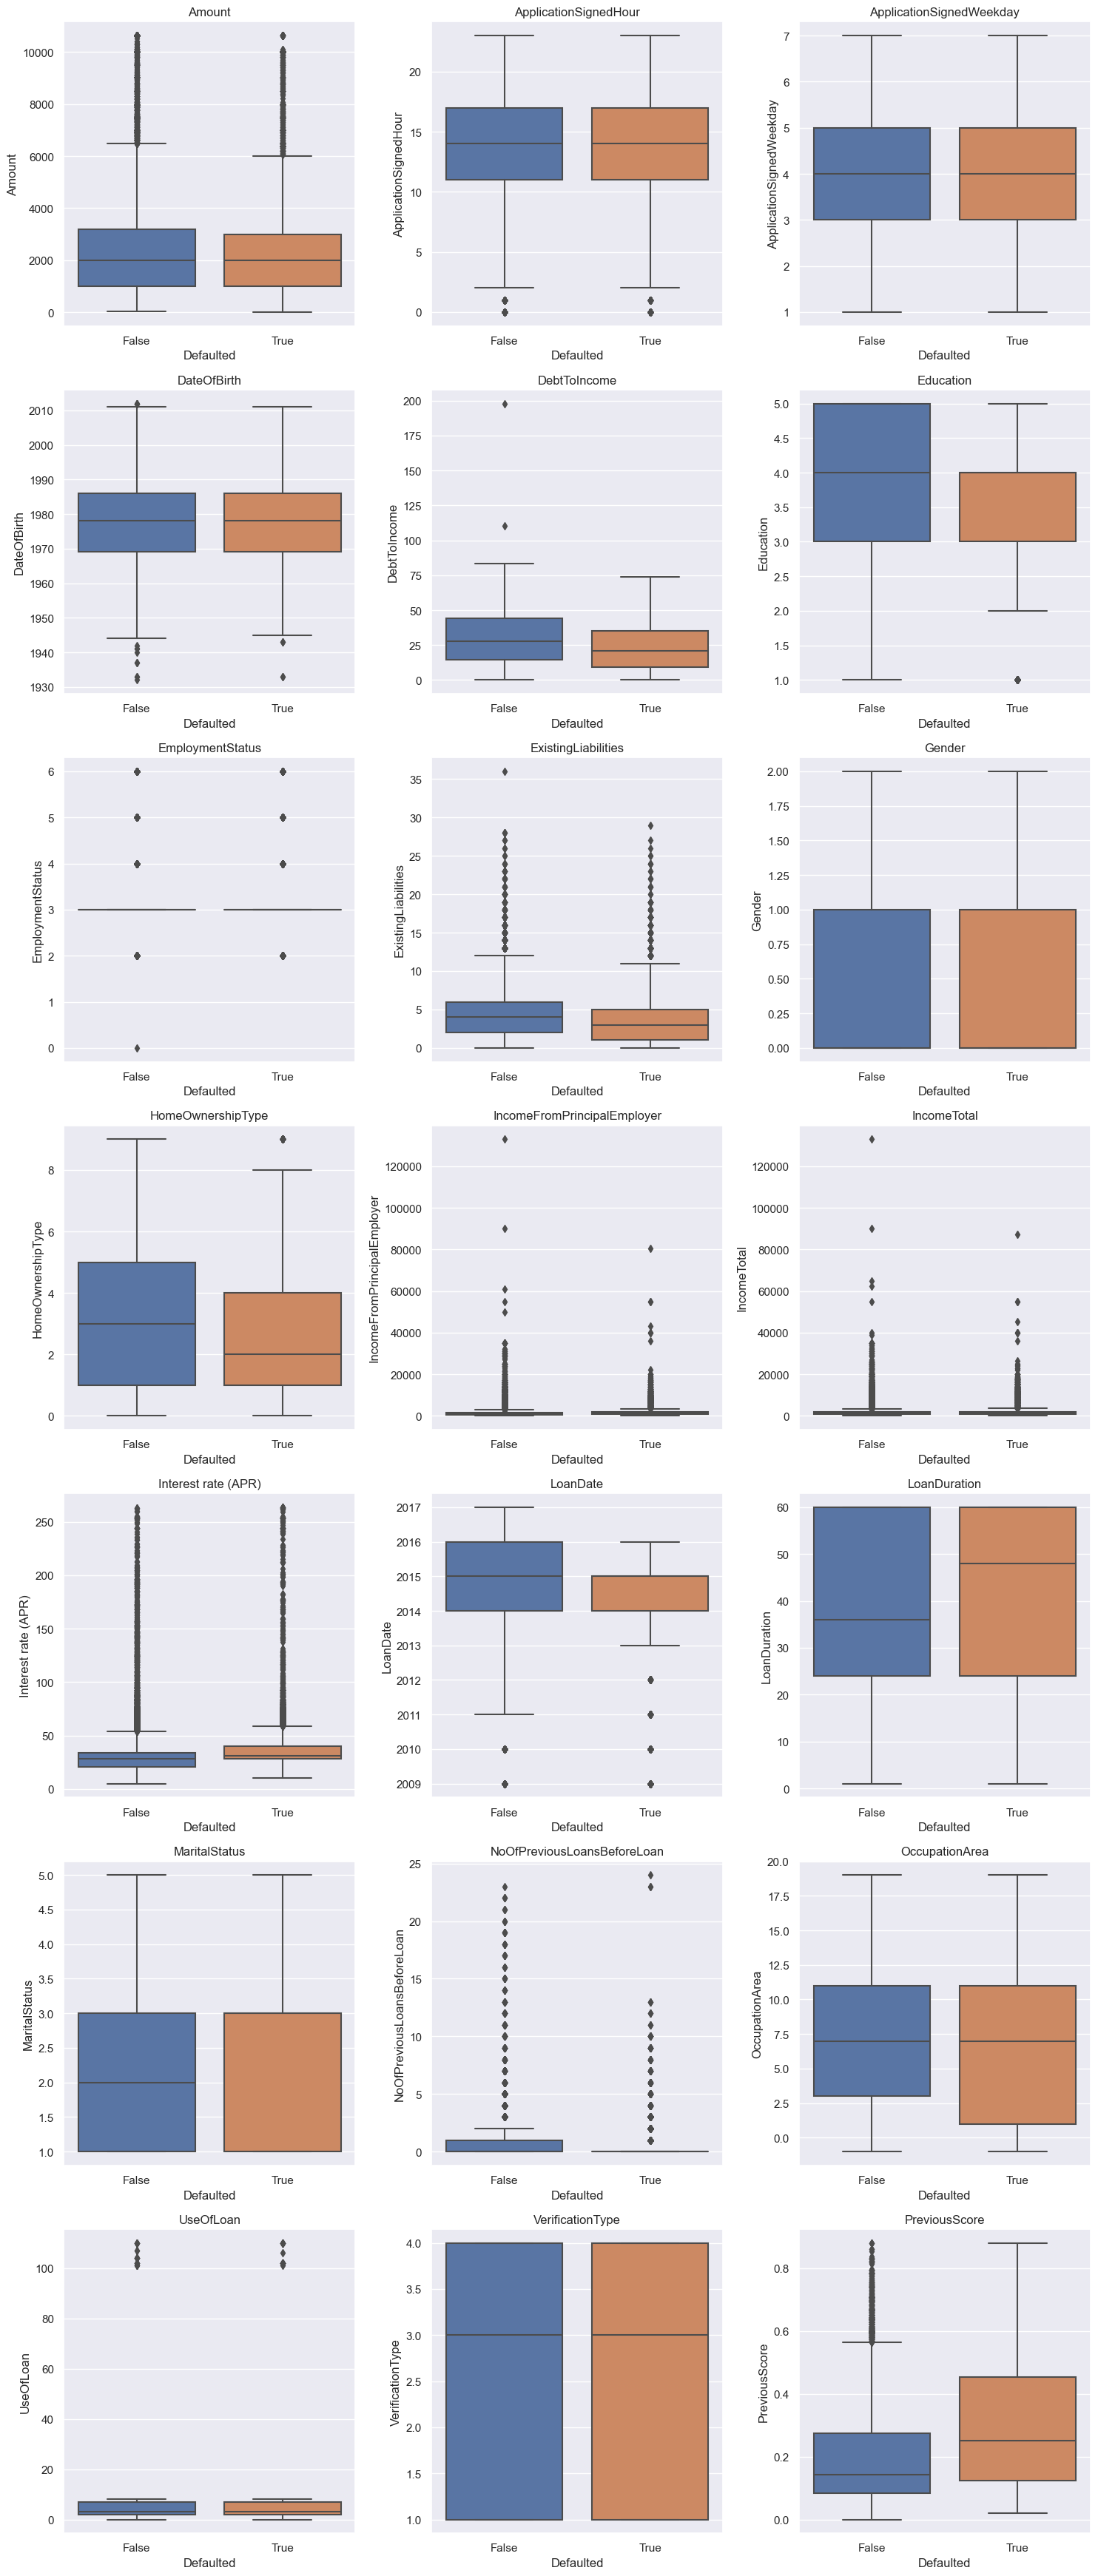

In [10]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='attrition'
for i, var in enumerate(int_vars):
    sns.boxplot(y=var, x='Defaulted', data=df, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

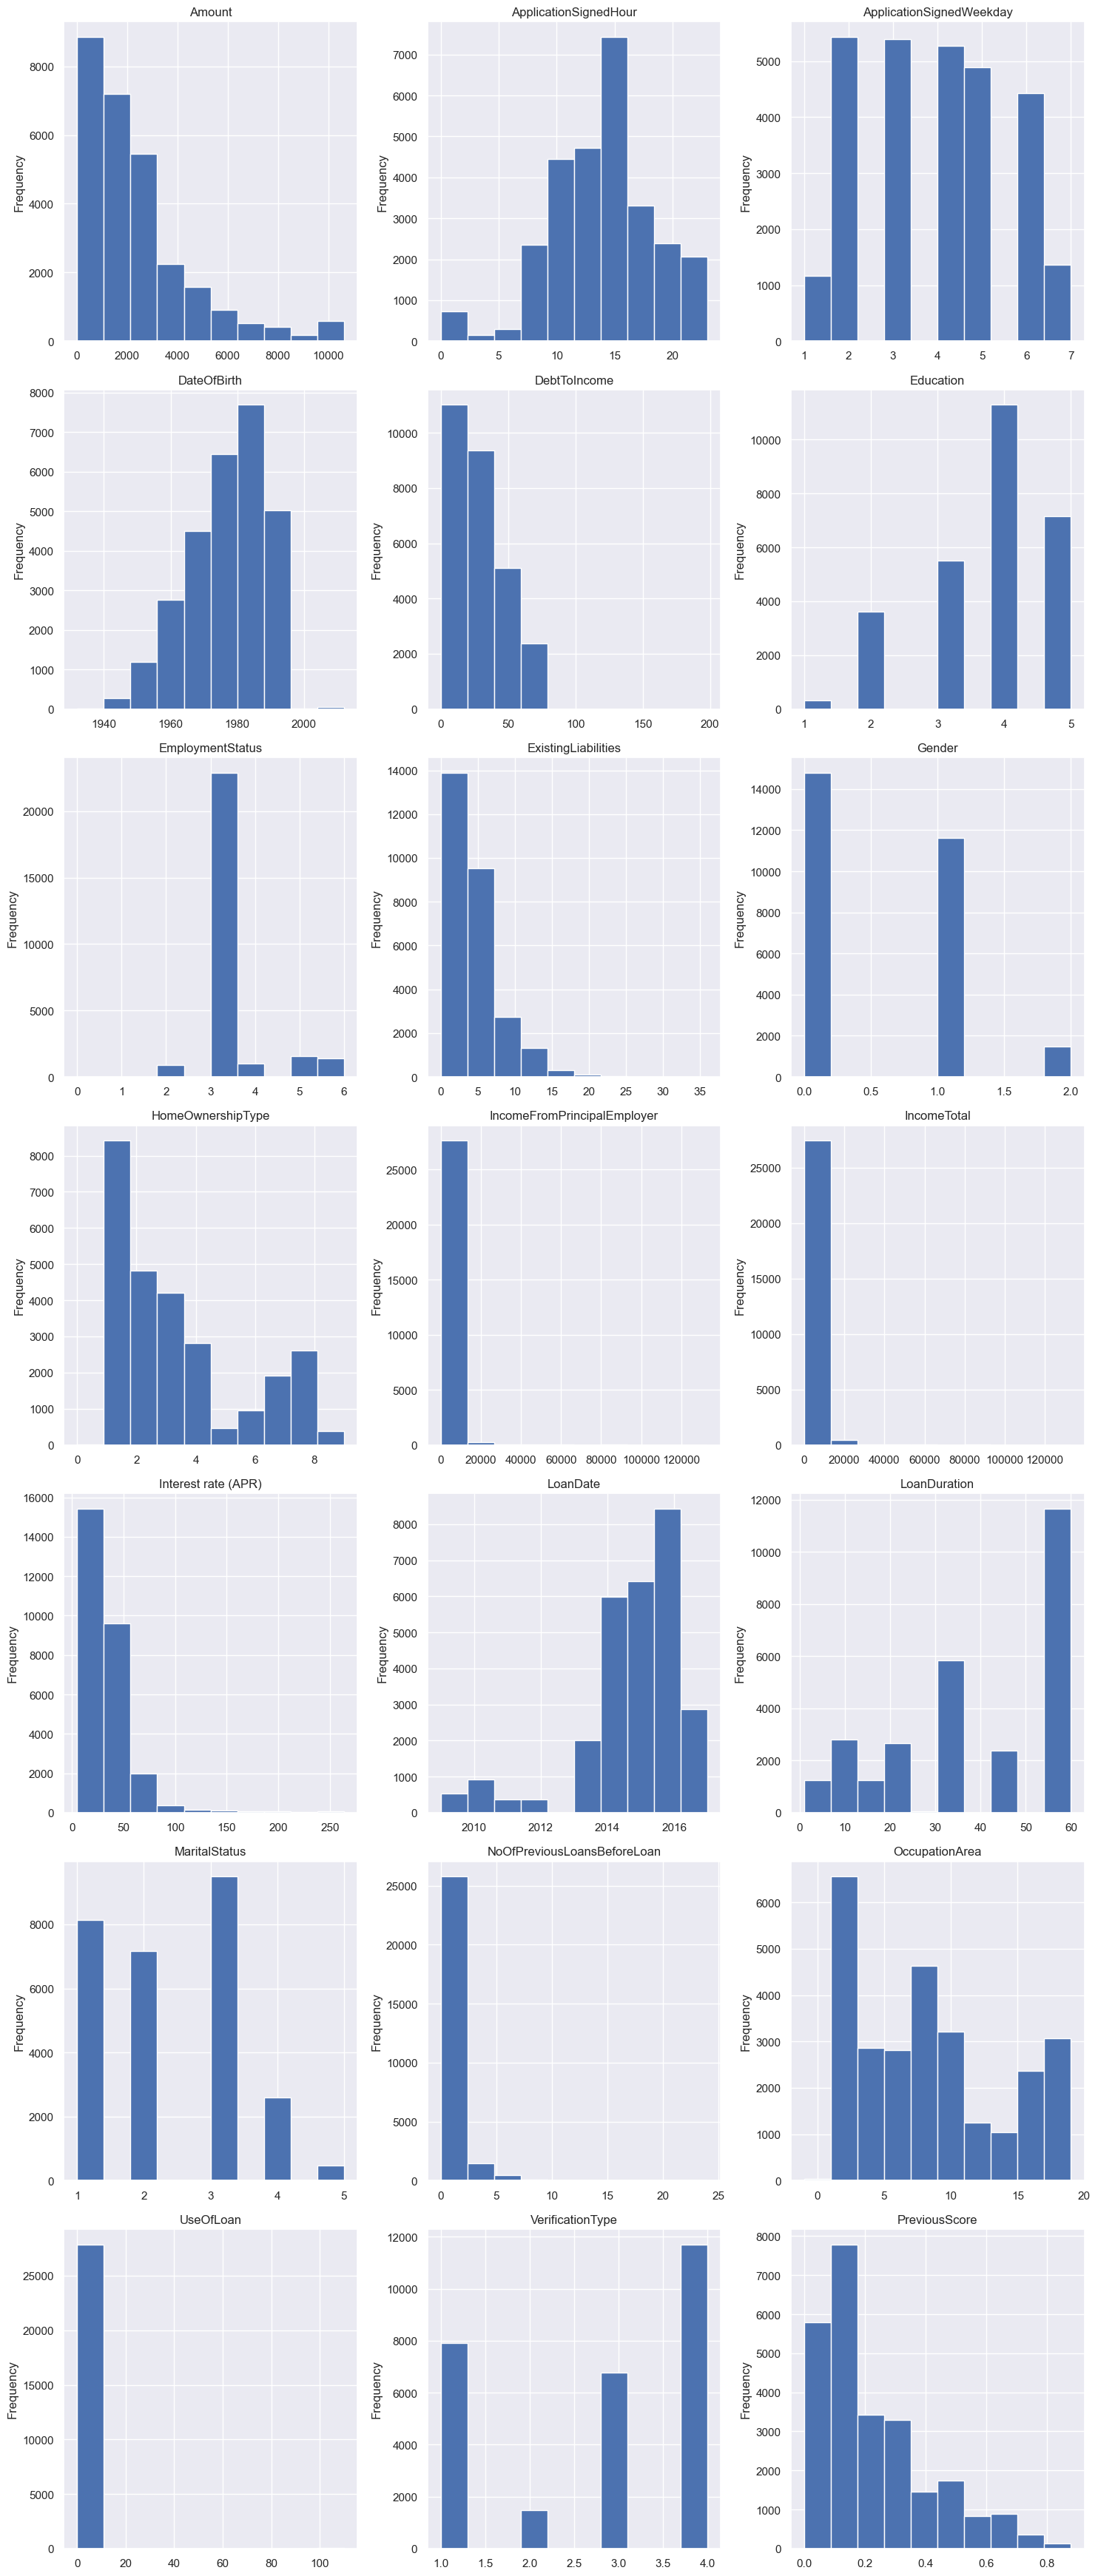

In [11]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable
for i, var in enumerate(int_vars):
    df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

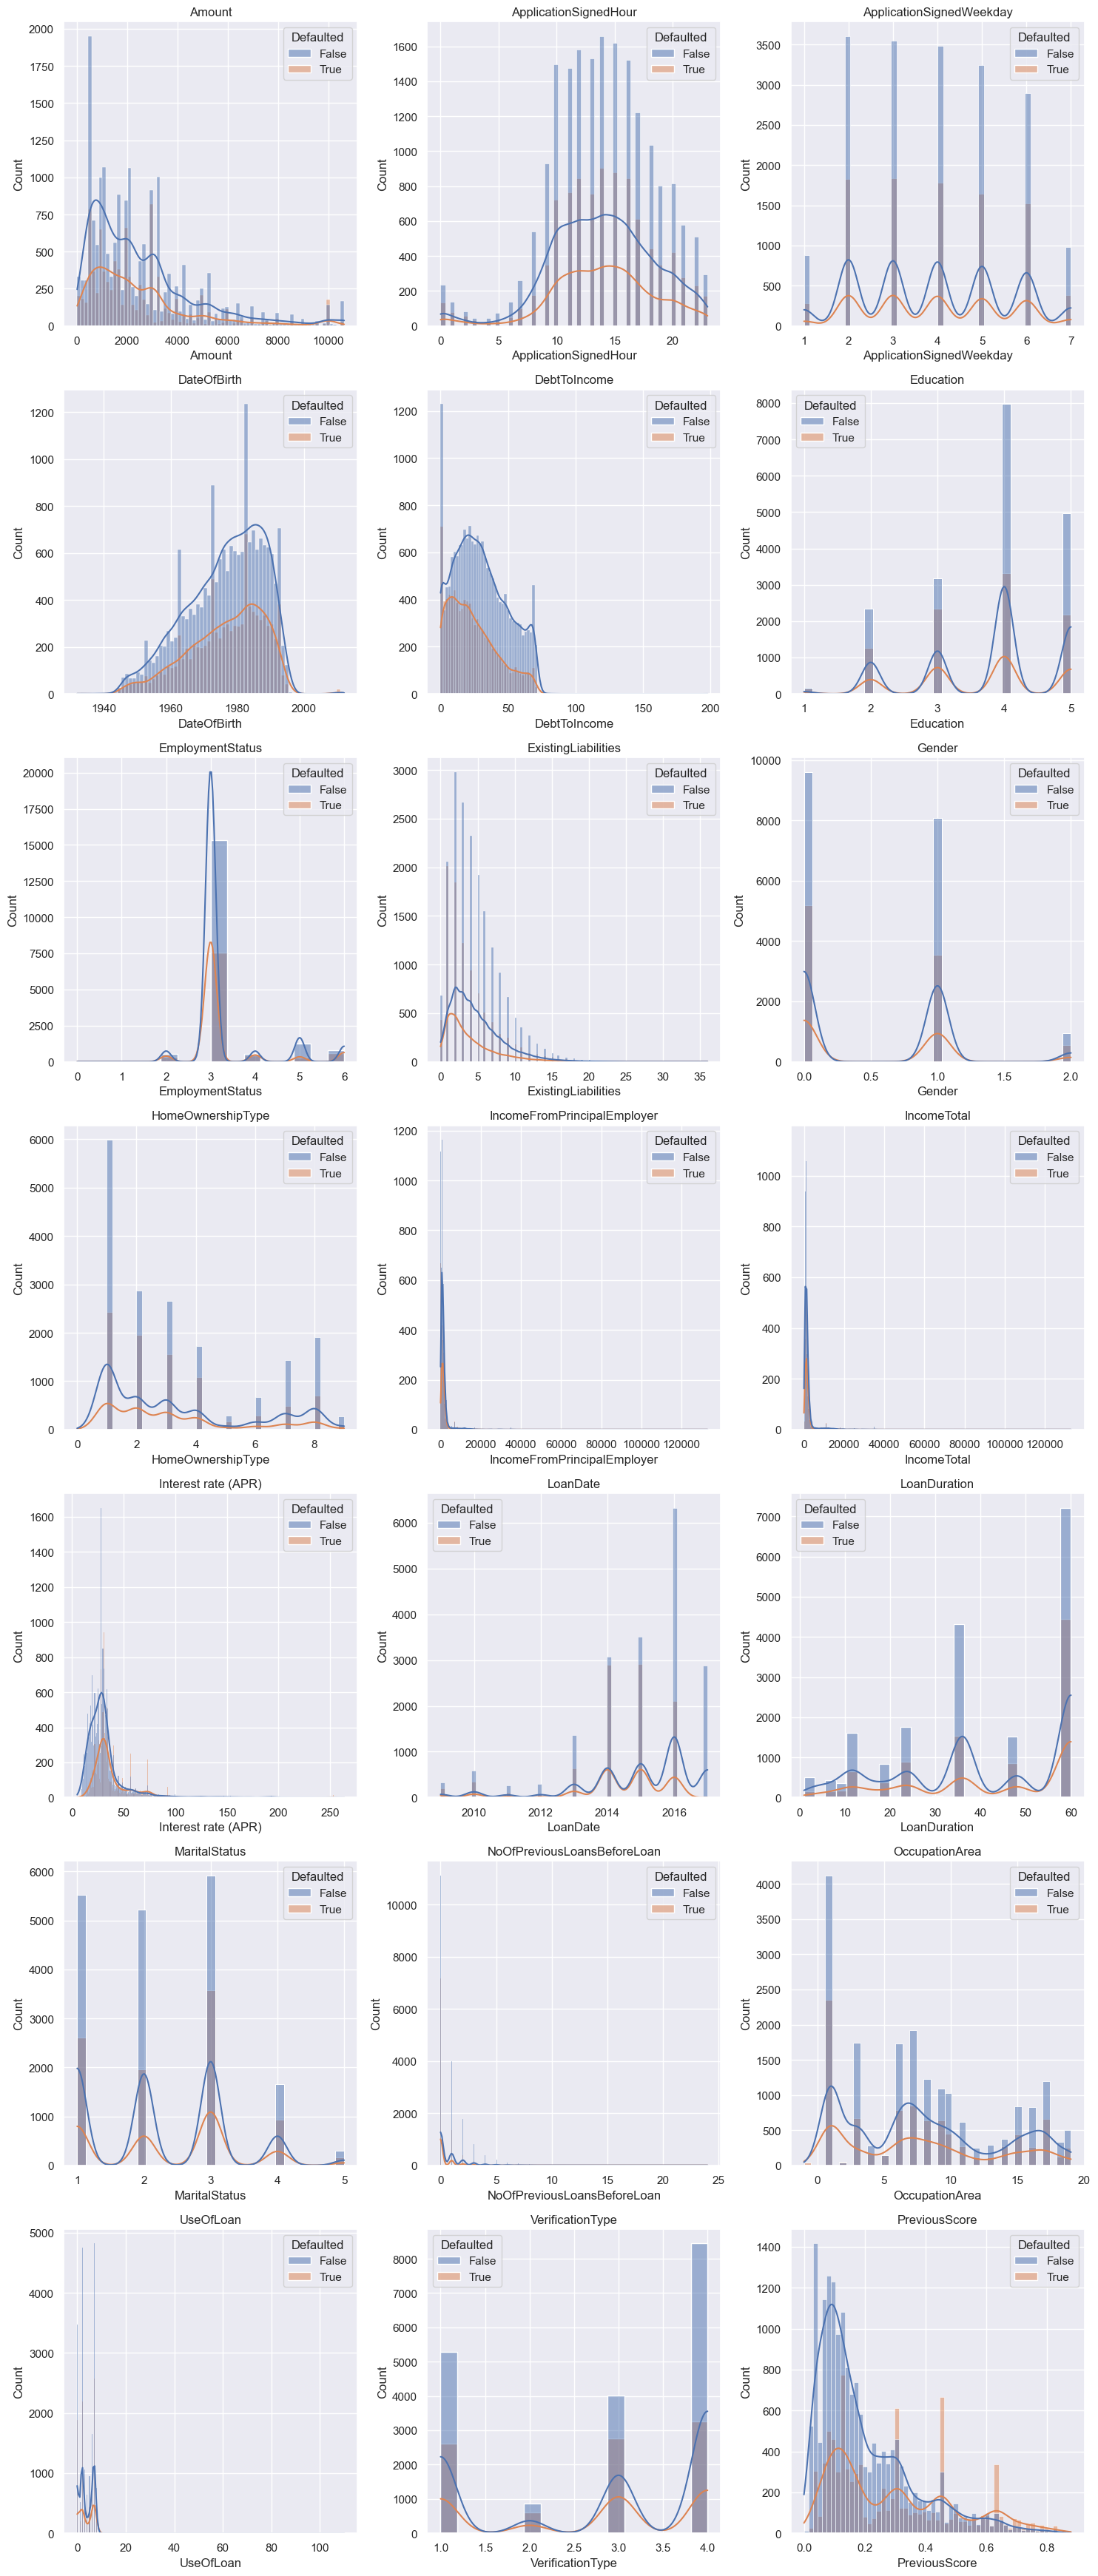

In [13]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable with hue='Attrition'
for i, var in enumerate(int_vars):
    sns.histplot(data=df, x=var, hue='Defaulted', kde=True, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

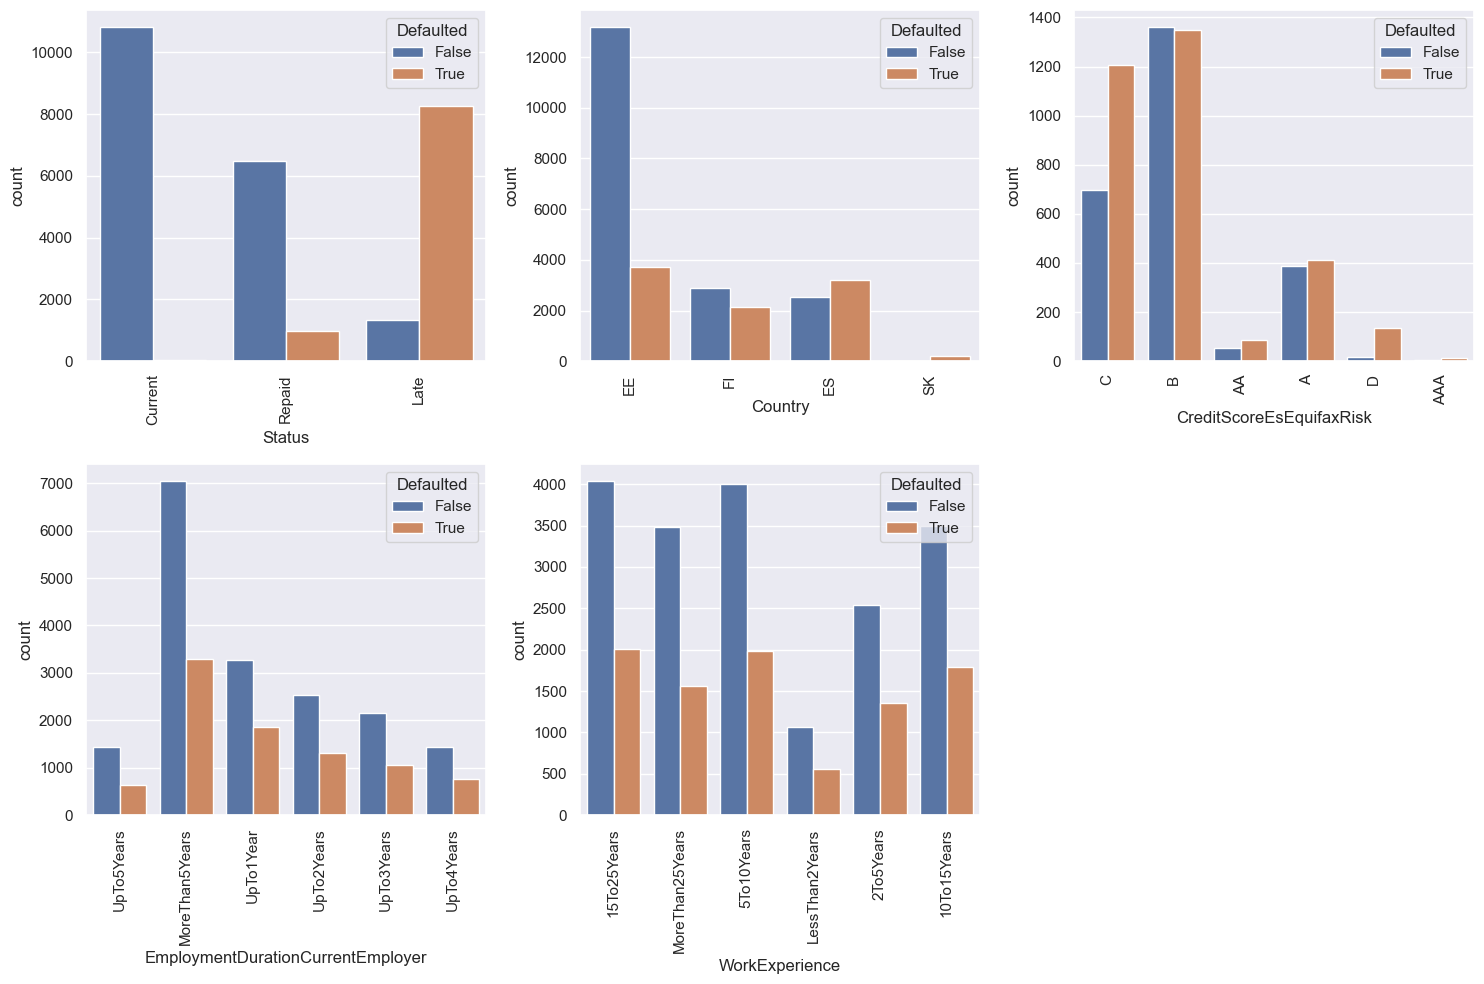

In [14]:
# Get the names of all columns with data type 'object' (categorical variables)
cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# Exclude 'Attrition' from the list if it exists in cat_vars
if 'Defaulted' in cat_vars:
    cat_vars.remove('Defaulted')

# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a count plot for the top 6 values of each categorical variable
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, hue='Defaulted', data=filtered_df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

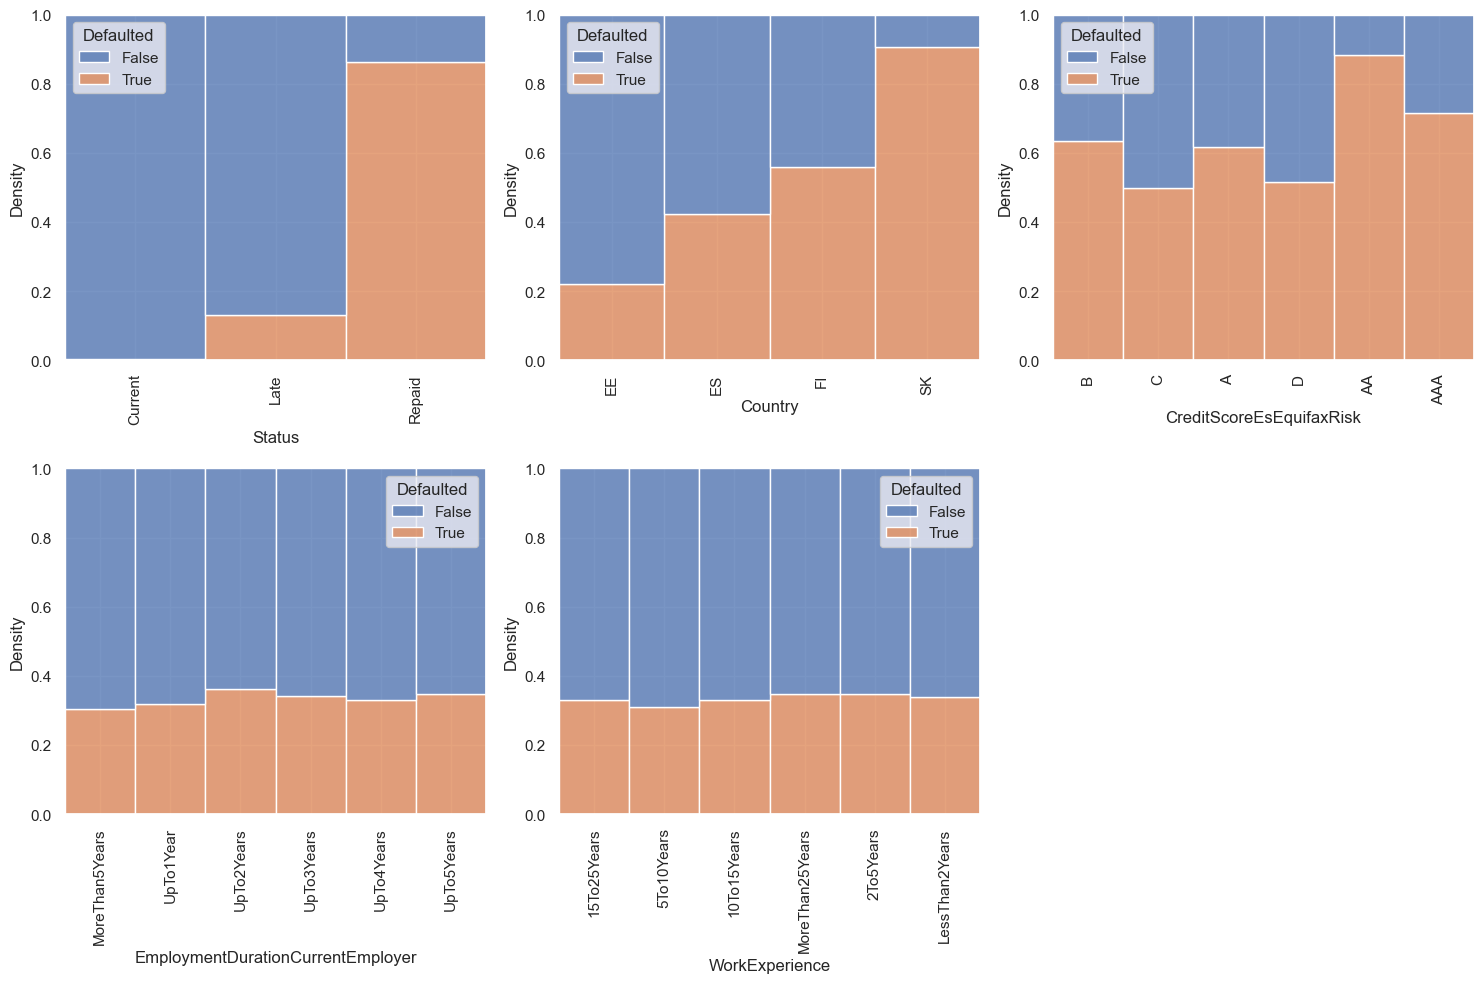

In [15]:
import warnings

# Get the names of all columns with data type 'object' (categorical variables)
cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# Exclude 'Attrition' from the list if it exists in cat_vars
if 'Defaulted' in cat_vars:
    cat_vars.remove('Defaulted')

# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a count plot for the top 6 values of each categorical variable as a density plot
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    
    # Set x-tick positions explicitly
    tick_positions = range(len(top_values))
    axs[i].set_xticks(tick_positions)
    axs[i].set_xticklabels(top_values, rotation=90)  # Set x-tick labels
    
    sns.histplot(x=var, hue='Defaulted', data=filtered_df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xlabel(var)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

C:\Users\Michael\AppData\Local\Temp\ipykernel_5504\943223290.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts = cat_counts_top.append(cat_counts_other)
C:\Users\Michael\AppData\Local\Temp\ipykernel_5504\943223290.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts = cat_counts_top.append(cat_counts_other)
C:\Users\Michael\AppData\Local\Temp\ipykernel_5504\943223290.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts = cat_counts_top.append(cat_counts_other)


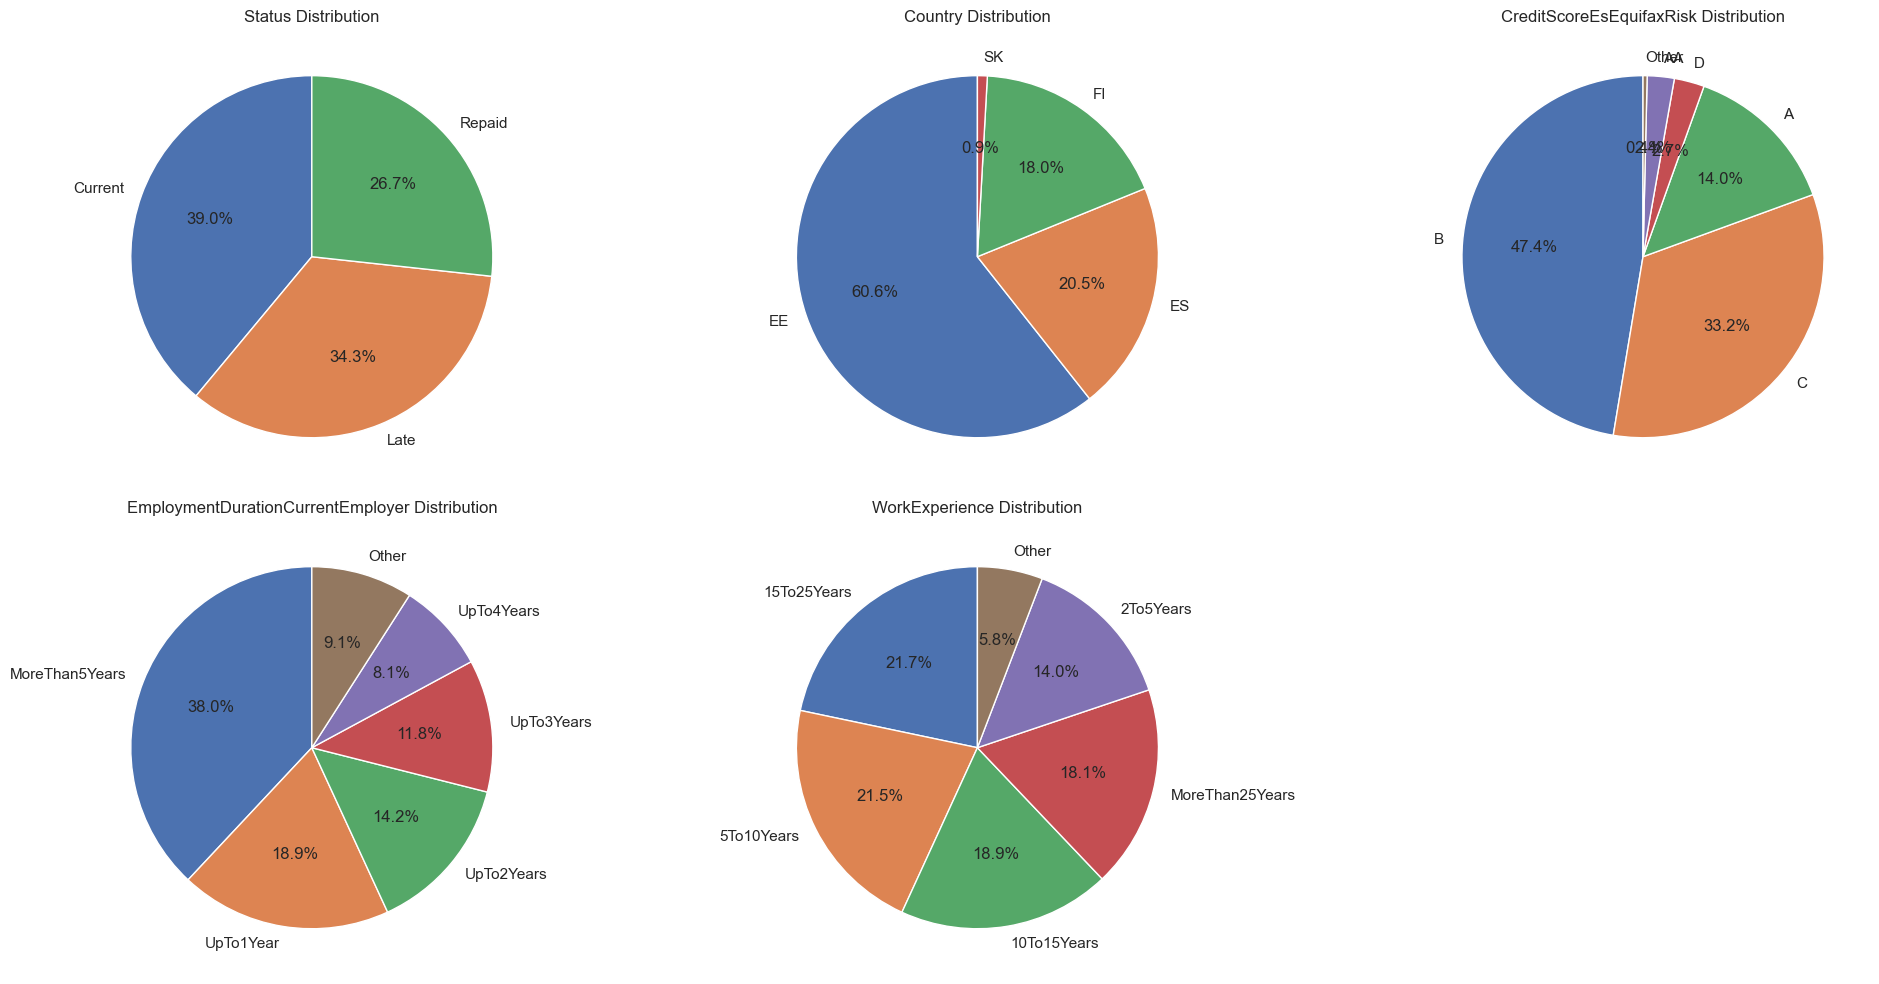

In [16]:
# Specify the maximum number of categories to show individually
max_categories = 5

# Filter categorical columns with 'object' data type
cat_cols = [col for col in df.columns if col != 'y' and df[col].dtype == 'object']

# Create a figure with subplots
num_cols = len(cat_cols)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5*num_rows))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Create a pie chart for each categorical column
for i, col in enumerate(cat_cols):
    if i < len(axs):  # Ensure we don't exceed the number of subplots
        # Count the number of occurrences for each category
        cat_counts = df[col].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)

        # Create a pie chart
        axs[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs[i].set_title(f'{col} Distribution')

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

# Data Preprocessing Part 2

In [17]:
# Check the amounnt of missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

CreditScoreEsEquifaxRisk             79.492782
PreviousScore                         7.830354
HomeOwnershipType                     4.835763
EmploymentDurationCurrentEmployer     2.482358
EmploymentStatus                      0.651933
OccupationArea                        0.290146
WorkExperience                        0.171938
DebtToIncome                          0.146864
Education                             0.146864
Gender                                0.146864
MaritalStatus                         0.146864
VerificationType                      0.146864
dtype: float64

In [18]:
# Remove CreditScoreEsEquifaxRisk because of 70% missing value
df.drop(columns = 'CreditScoreEsEquifaxRisk', inplace=True)

In [19]:
# Fill PreviousScore with median value
df['PreviousScore'].fillna(df['PreviousScore'].median(), inplace=True)

In [20]:
# Rest of them, remove the null value
df.dropna(inplace=True)

In [21]:
df.shape

(26231, 27)

In [22]:
# Check the amounnt of missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

# Label Encoding for Object Datatypes

In [23]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Status: ['Current' 'Repaid' 'Late']
Country: ['EE' 'FI' 'ES' 'SK']
EmploymentDurationCurrentEmployer: ['UpTo5Years' 'MoreThan5Years' 'UpTo1Year' 'UpTo2Years' 'UpTo3Years'
 'UpTo4Years' 'TrialPeriod']
WorkExperience: ['15To25Years' 'MoreThan25Years' '5To10Years' 'LessThan2Years' '2To5Years'
 '10To15Years']


In [24]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Status: [0 2 1]
Country: [0 2 1 3]
EmploymentDurationCurrentEmployer: [6 0 2 3 4 5 1]
WorkExperience: [1 5 3 4 2 0]


<AxesSubplot:>

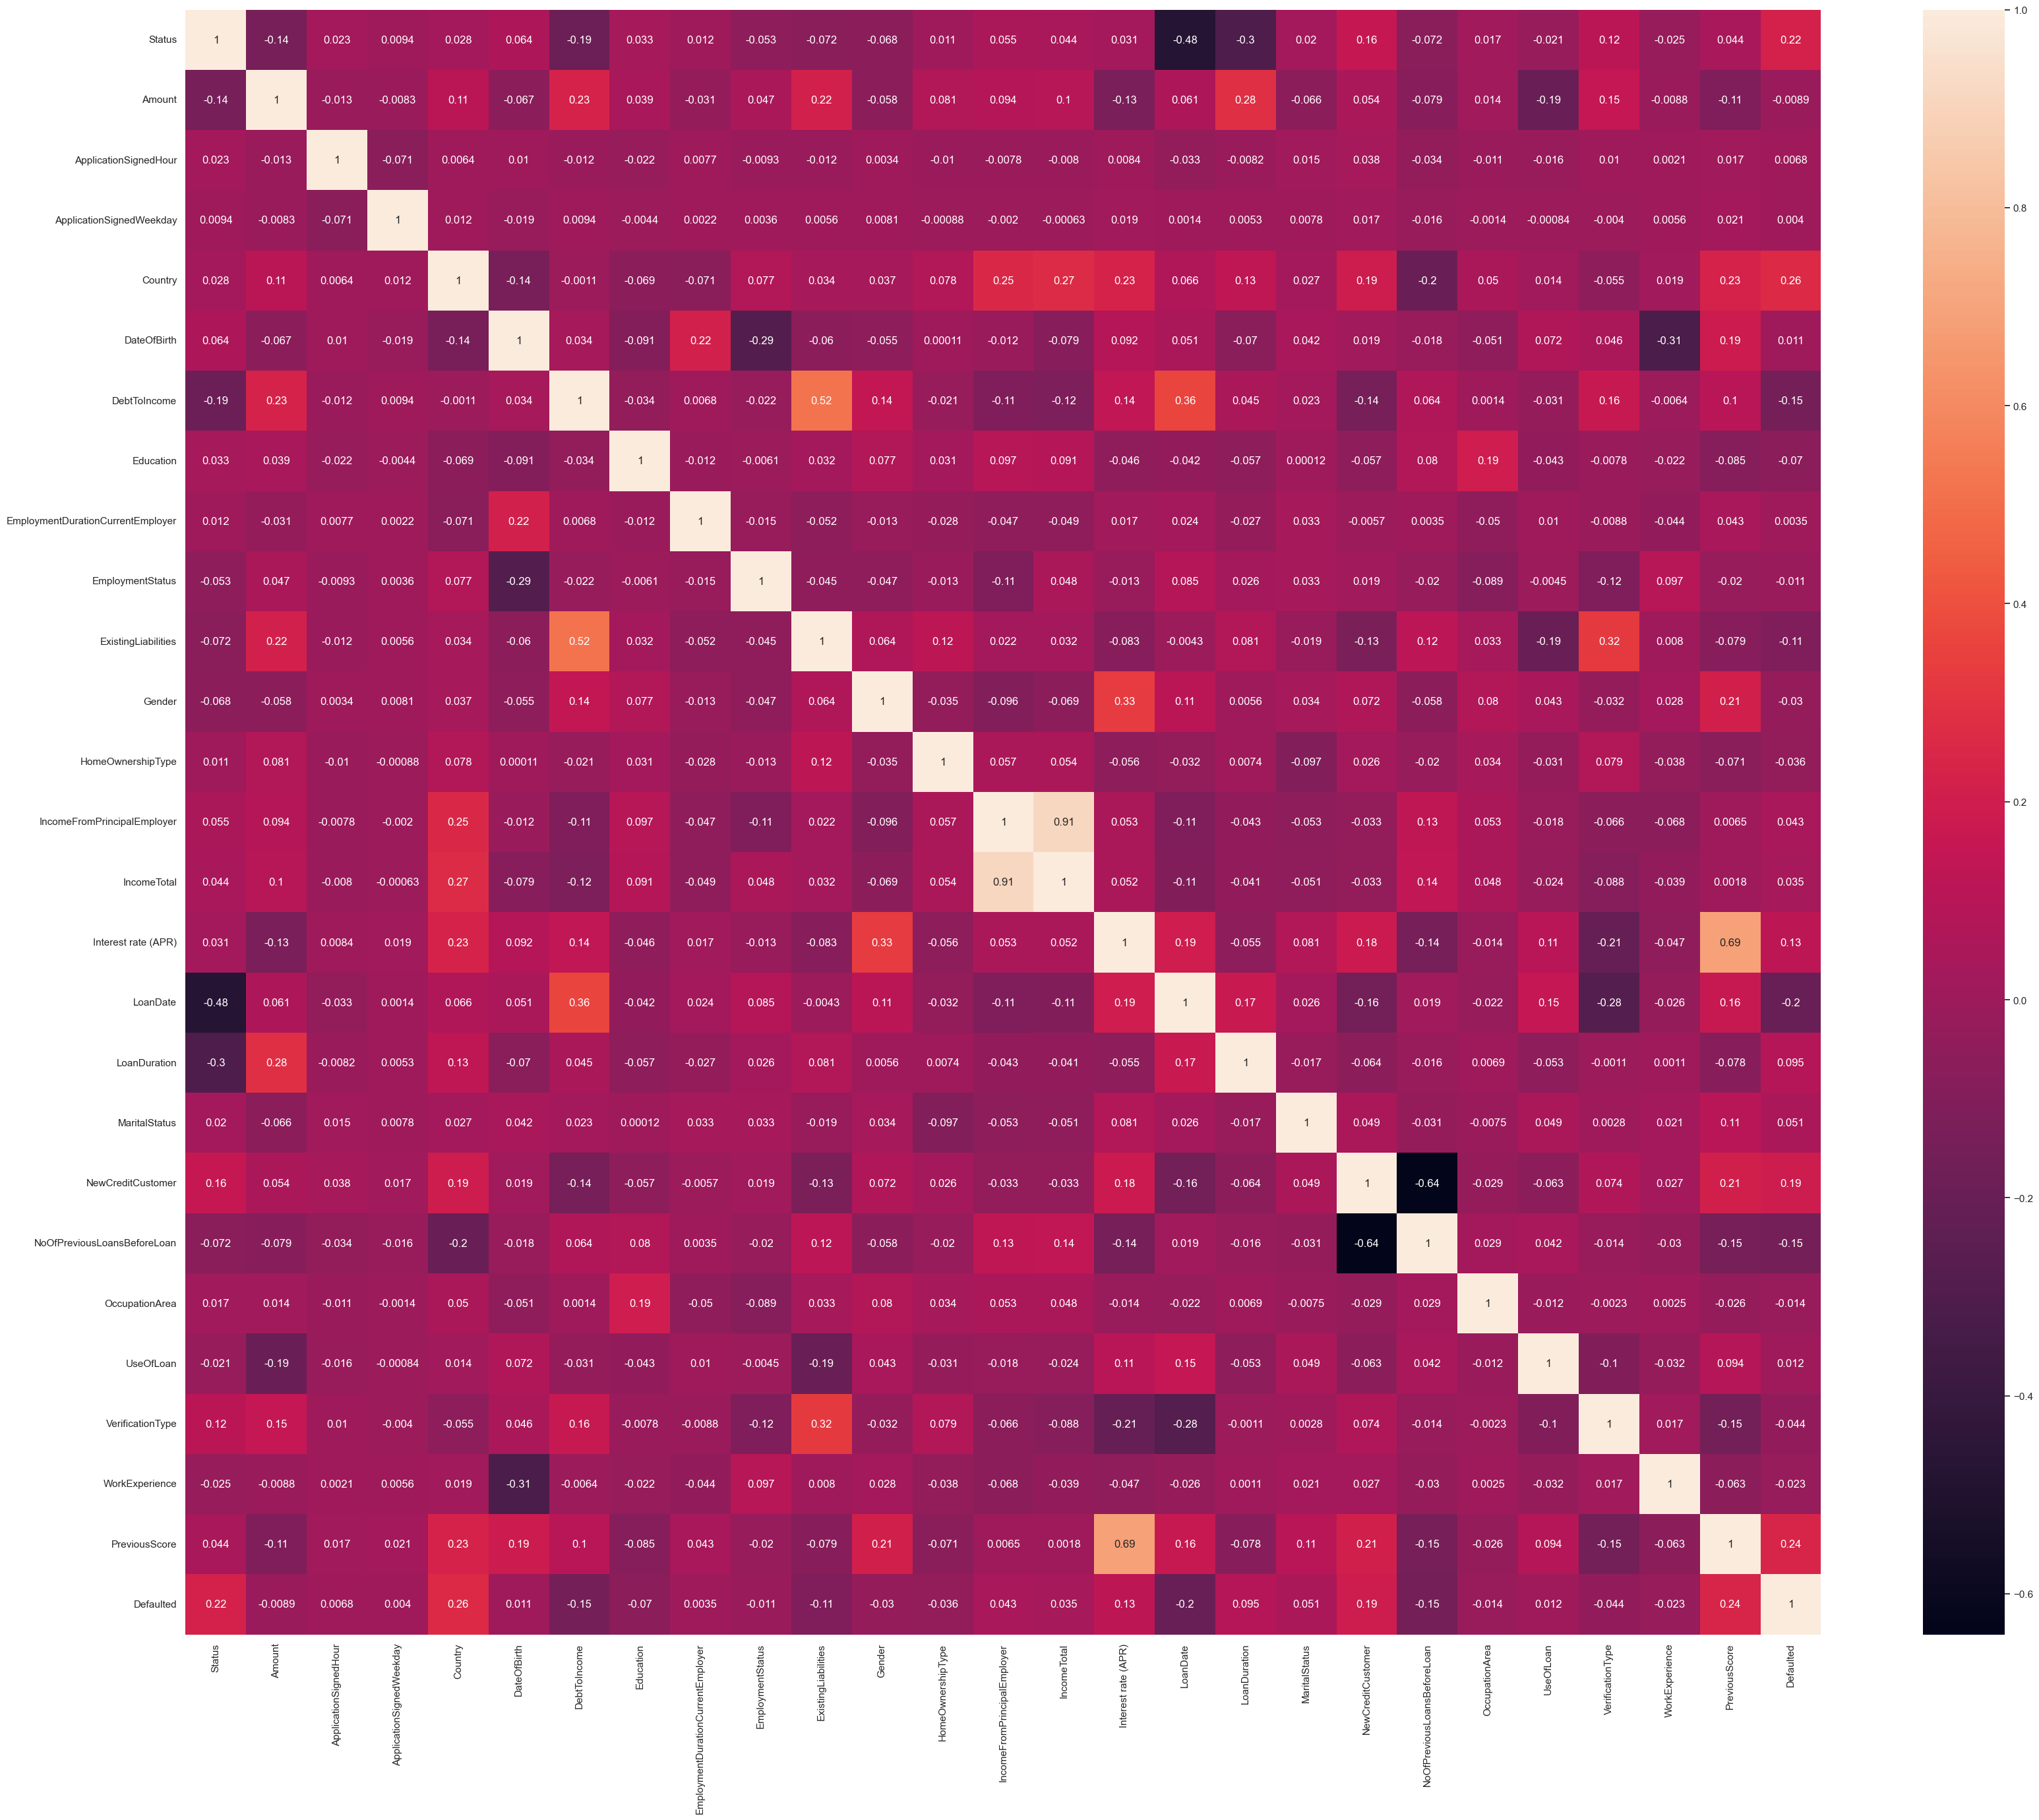

In [26]:
# Correlation Heatmap
plt.figure(figsize=(40, 32))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

# Train Test Split

In [27]:
X = df.drop('Defaulted', axis=1)
y = df['Defaulted']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Remove Outlier from Train Data using Z-Score

In [28]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['Amount', 'ApplicationSignedHour', 'DateOfBirth',
                    'DebtToIncome', 'ExistingLiabilities', 'IncomeFromPrincipalEmployer',
                    'IncomeTotal', 'Interest rate (APR)', 'NoOfPreviousLoansBeforeLoan',
                    'UseOfLoan', 'PreviousScore']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [30]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_leaf=1, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=0)

In [31]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 93.58 %


In [32]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.9357728225652754
Precision Score :  0.9357728225652754
Recall Score :  0.9357728225652754
Jaccard Score :  0.879297994269341
Log Loss :  2.2183598172956702


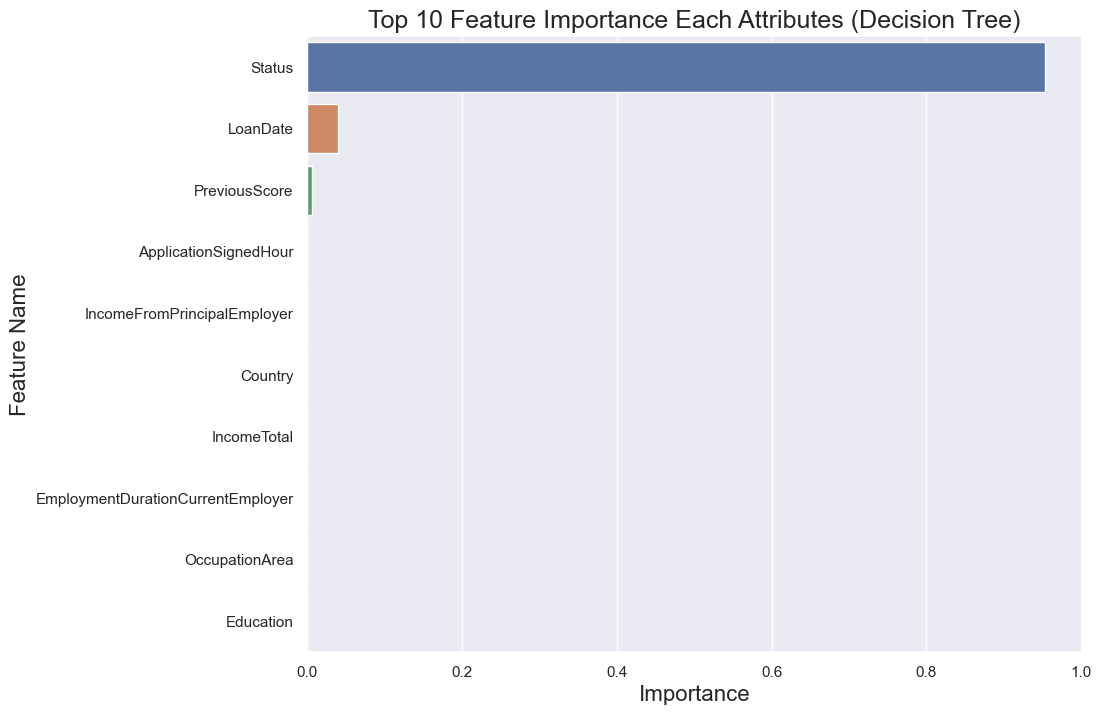

In [33]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


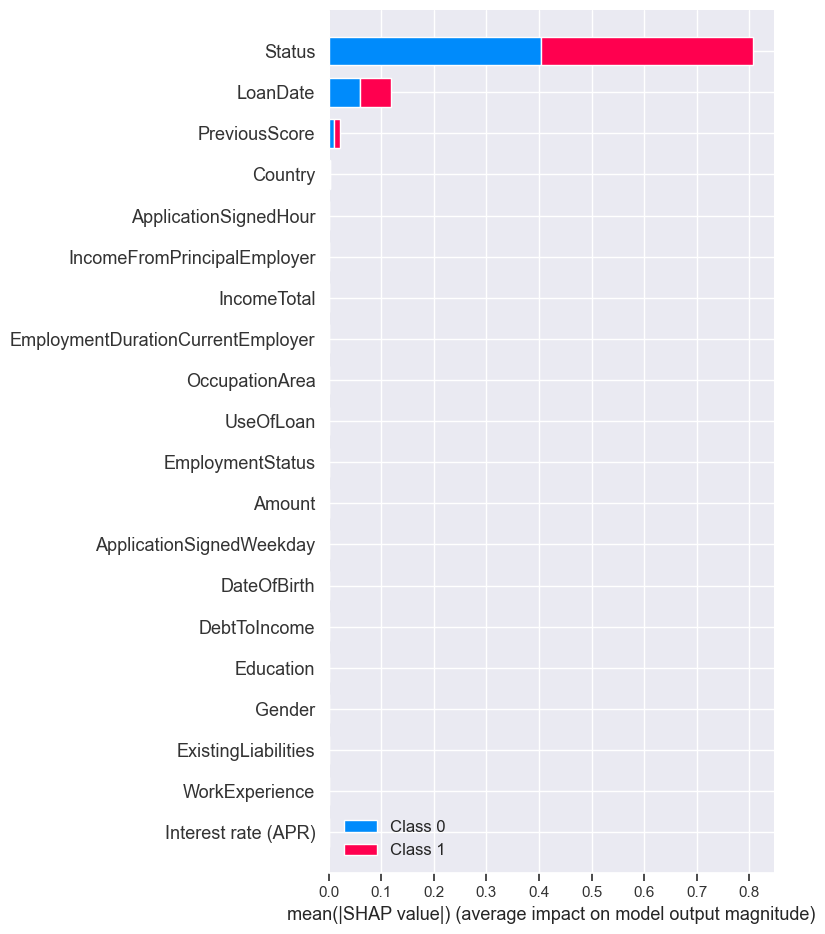

In [34]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

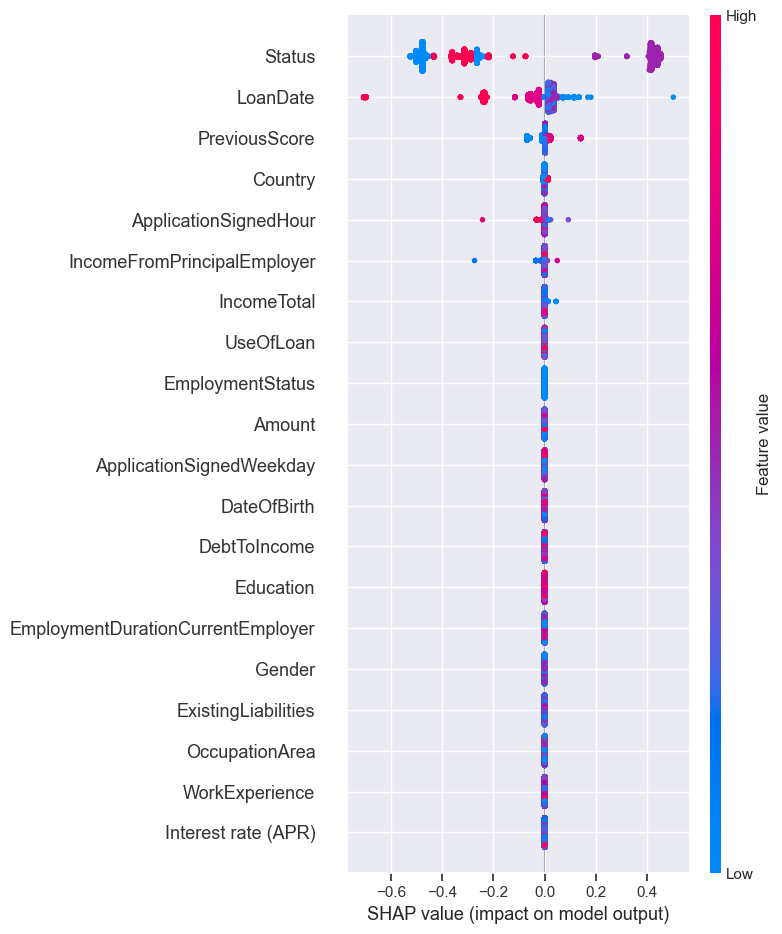

In [35]:
# compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.9357728225652754')

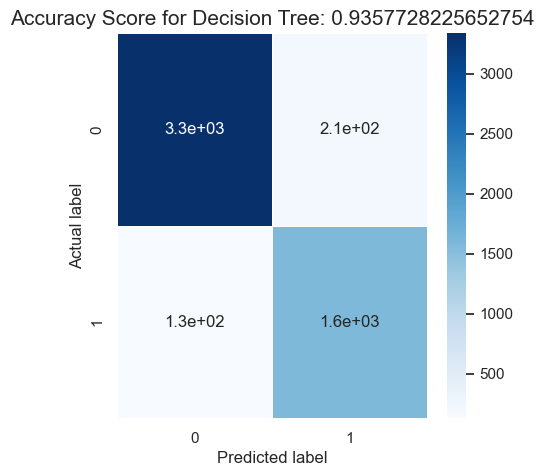

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

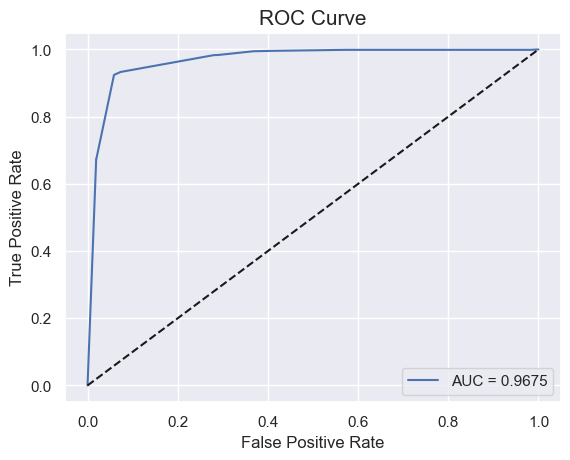

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 42}


In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, max_depth=None, max_features='sqrt', n_estimators=200, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       n_estimators=200, random_state=42)

In [40]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 93.35 %


In [41]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.9334858014103297
Precision Score :  0.9334858014103297
Recall Score :  0.9334858014103297
Jaccard Score :  0.8752680486061473
Log Loss :  2.2973434147918166


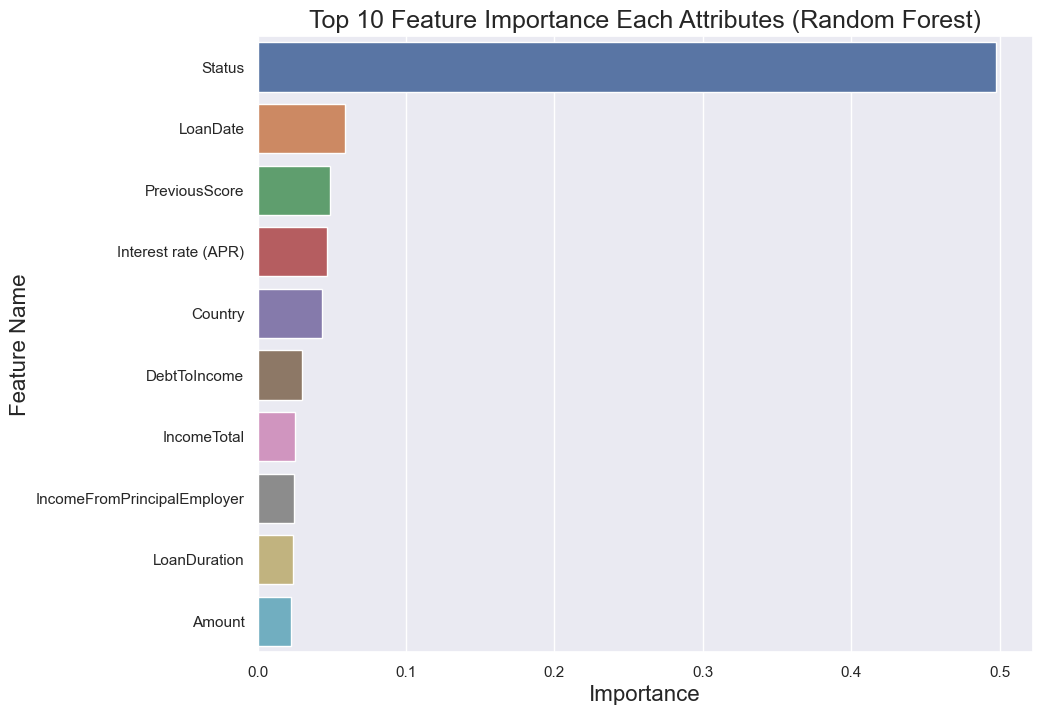

In [42]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

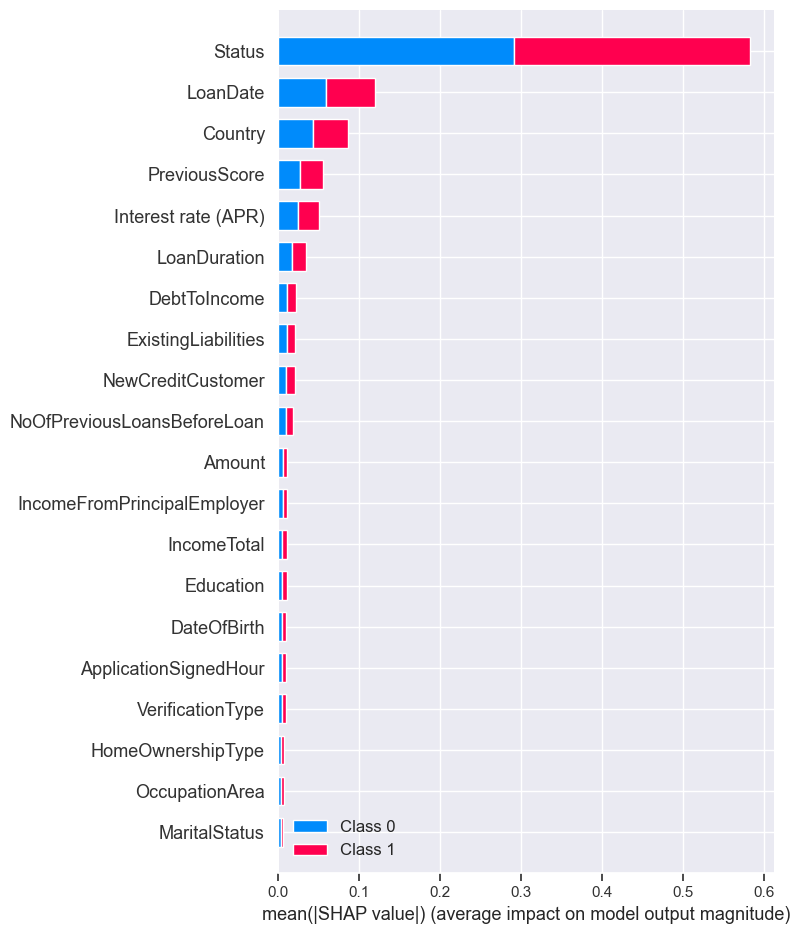

In [43]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

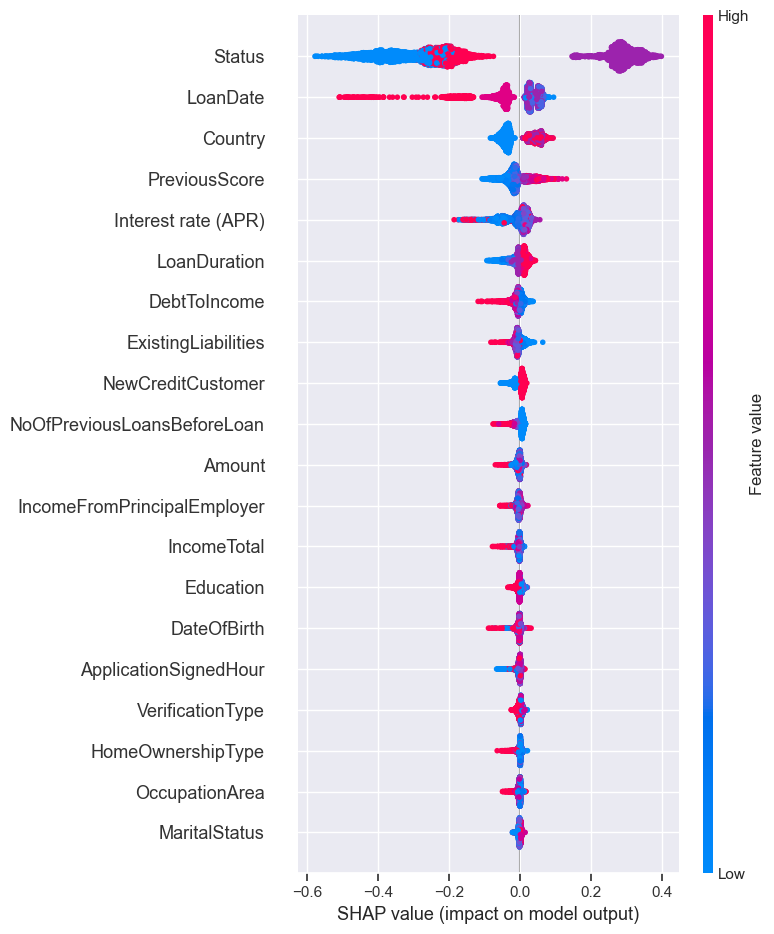

In [44]:
# compute SHAP values
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.9334858014103297')

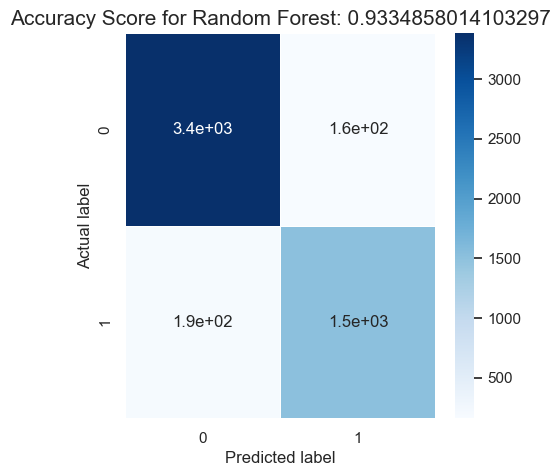

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

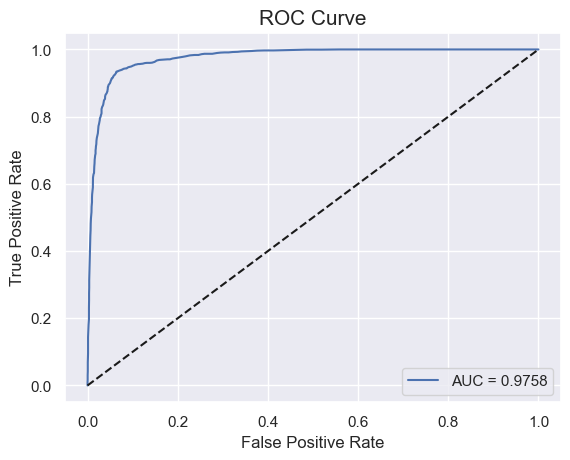

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()